In [2]:
import skimage as sk
from scipy.ndimage import gaussian_filter
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from copy import copy
import napari

In [3]:
image = sk.io.imread('./domes/Dome103_processed.tif')
prediction_image = sk.io.imread('./domes/Dome103_processed_n2v2d.tif')

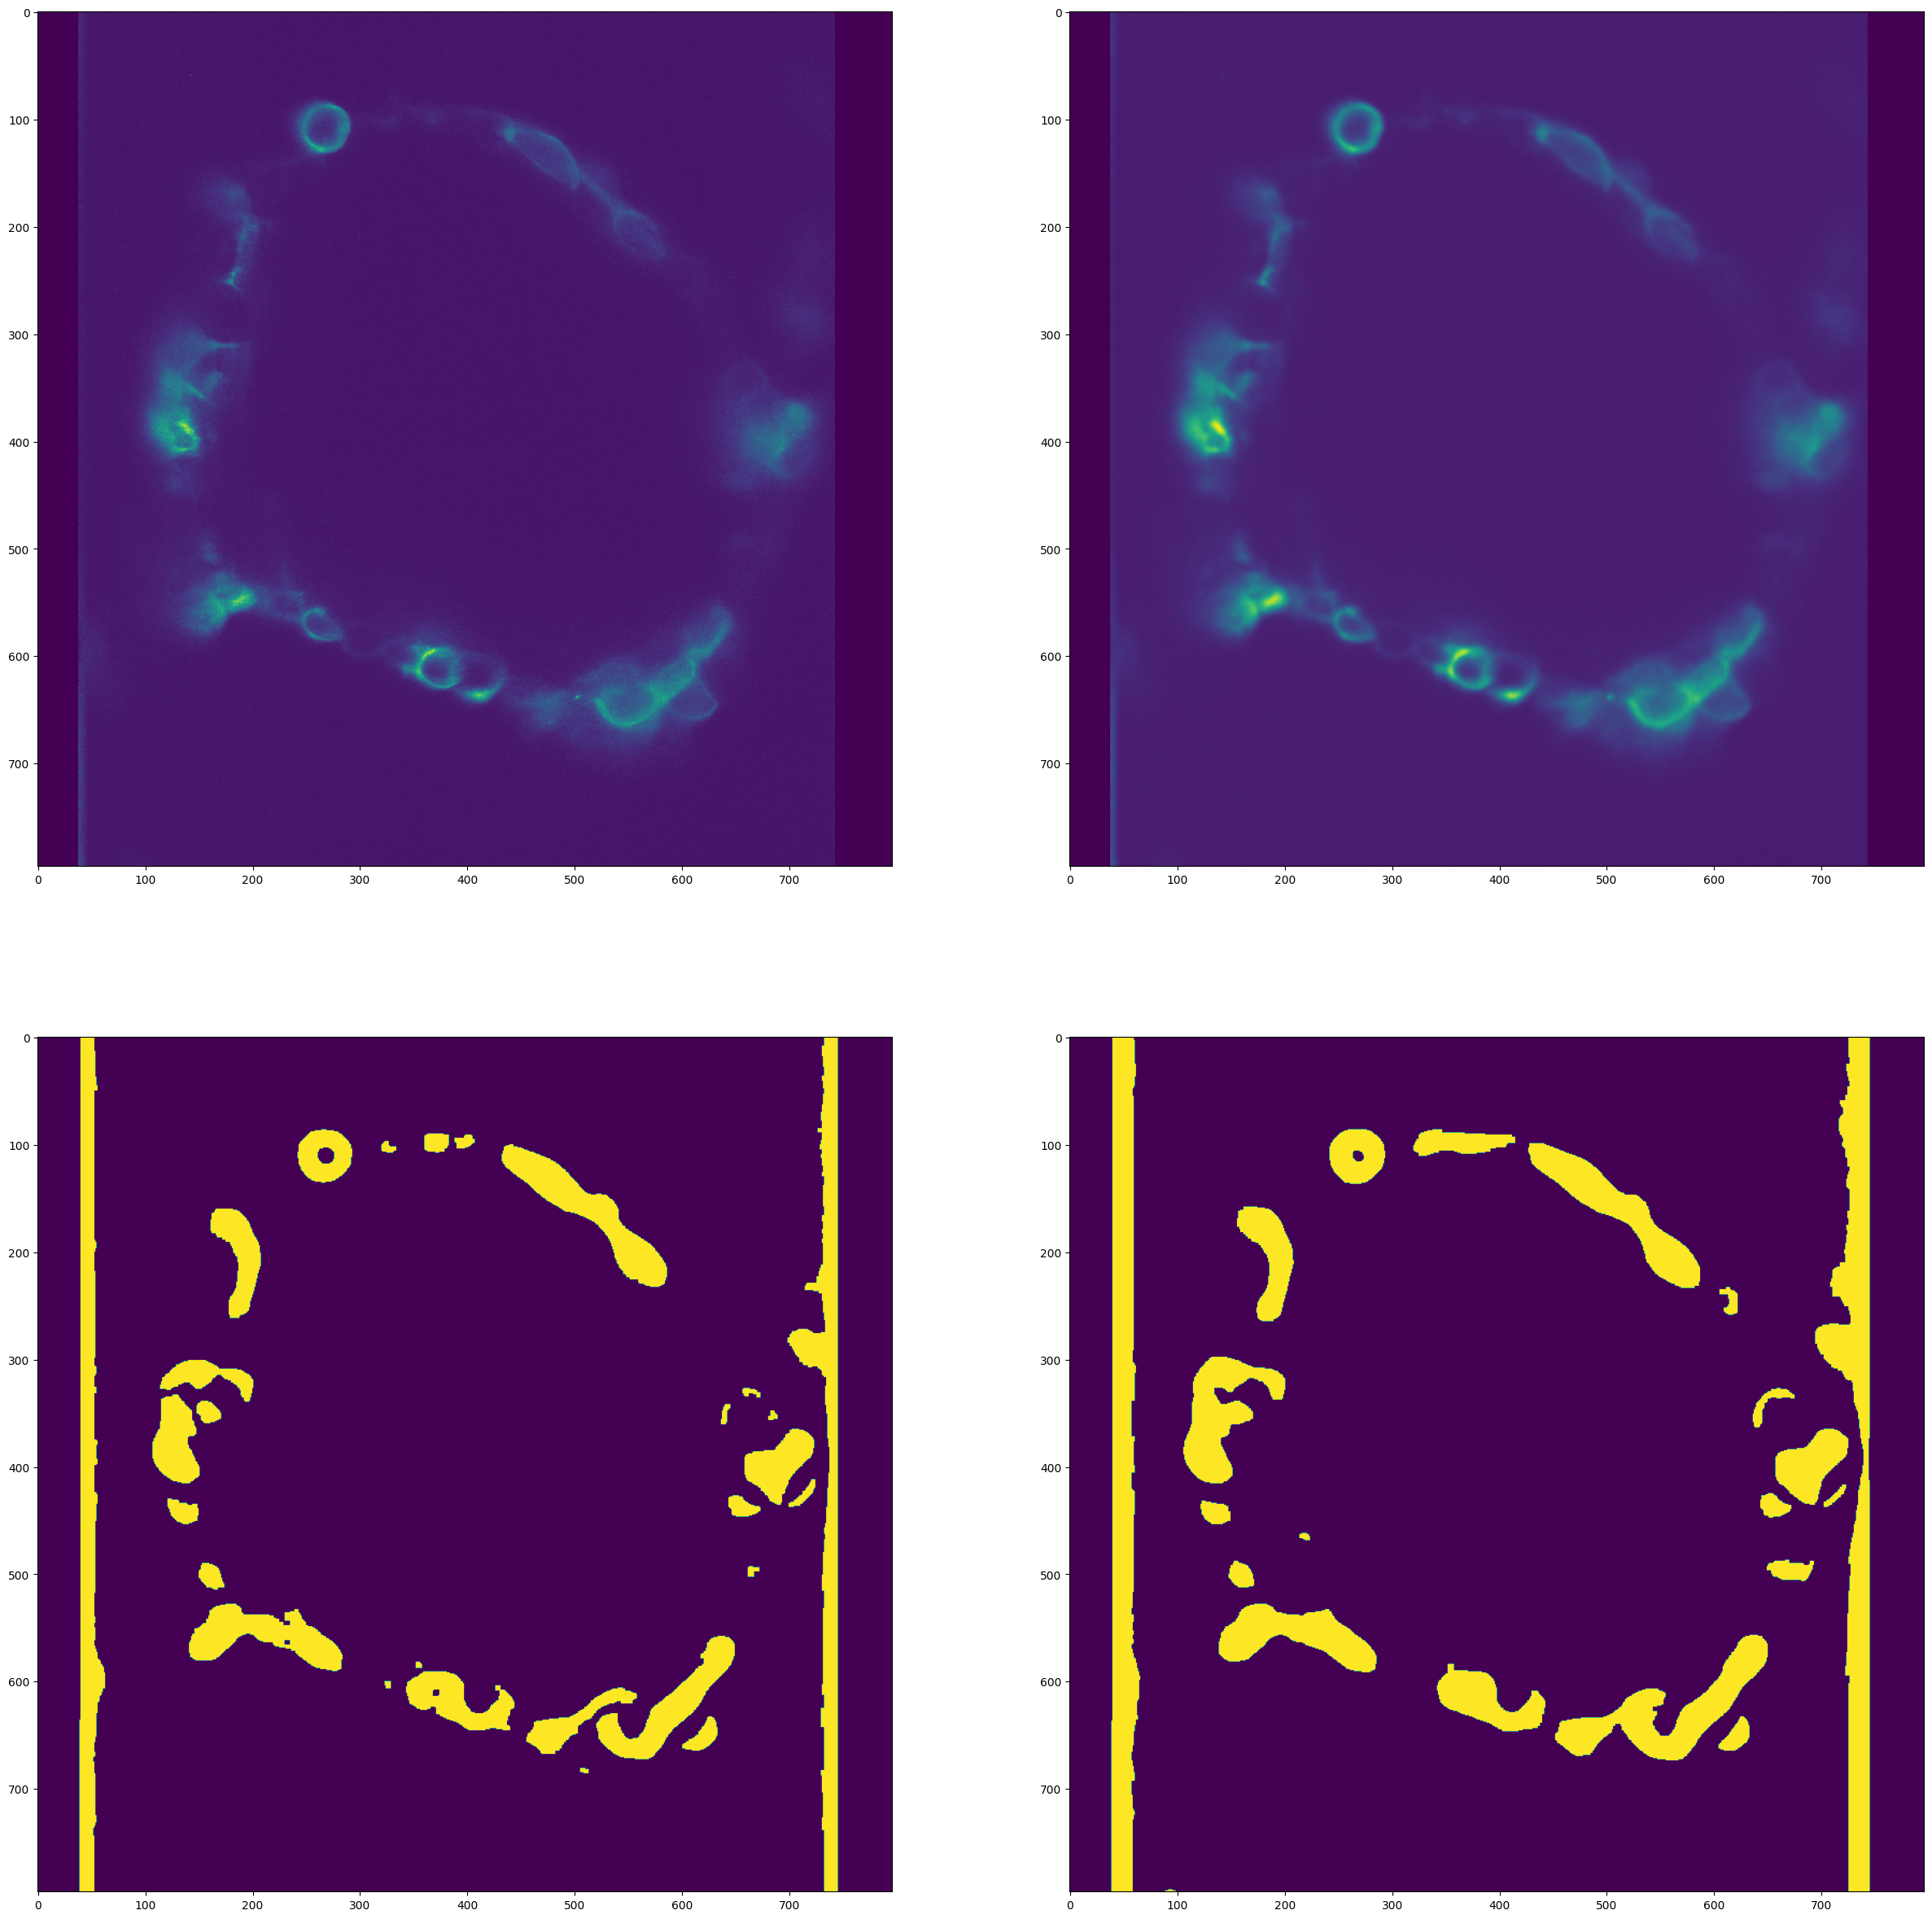

In [87]:
z_pos = 200

im = image[z_pos]
pred_im = prediction_image[z_pos]


kernel = np.ones((4,4), np.uint8)

im = im.astype(np.uint8)
gaussian_im = gaussian_filter(im, sigma=1)
median_im = sk.filters.rank.median(gaussian_im, sk.morphology.star(12))
th3_im = cv.adaptiveThreshold(median_im, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 55, -1) # Needs uint8 to make the asaptive threshold mask
th3_im = cv.morphologyEx(th3_im, cv.MORPH_OPEN, kernel=kernel)
th3_im = cv.morphologyEx(th3_im, cv.MORPH_CLOSE, kernel=kernel)

pred_im = pred_im.astype(np.uint8)
gaussian_pred_im = gaussian_filter(pred_im, sigma=1) 
median_pred_im = sk.filters.rank.median(gaussian_pred_im, sk.morphology.star(12))
th3_pred_im = cv.adaptiveThreshold(median_pred_im, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 85, -1) # Needs uint8 to make the asaptive threshold mask
th3_pred_im = cv.morphologyEx(th3_pred_im, cv.MORPH_OPEN, kernel=kernel)
th3_pred_im = cv.morphologyEx(th3_pred_im, cv.MORPH_CLOSE, kernel=kernel)

# _, th3_pred_im = cv.threshold(median_pred_im, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

plt.figure(figsize=(30,30))
plt.subplot(2,2,1)
plt.imshow(image[z_pos])
plt.subplot(2,2,2)
plt.imshow(prediction_image[z_pos])
plt.subplot(2,2,3)
plt.imshow(th3_im)
plt.subplot(2,2,4)
plt.imshow(th3_pred_im)


error: OpenCV(4.8.1) :-1: error: (-5:Bad argument) in function 'morphologyEx'
> Overload resolution failed:
>  - src data type = 0 is not supported
>  - Expected Ptr<cv::UMat> for argument 'src'


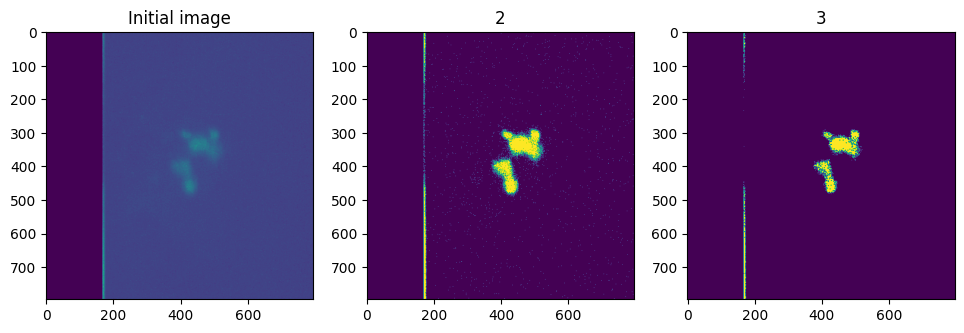

In [248]:
image = sk.io.imread('./../domes/Dome103_processed.tif')
z_pos = 70
im = copy(image[z_pos])

non_zero_cols = np.any(im != 0, axis = 0)
first_non_zero_col = np.argmax(non_zero_cols)
last_non_zero_col = len(non_zero_cols) - np.argmax(non_zero_cols[::-1]) - 1
clean_image = im[:, first_non_zero_col:last_non_zero_col + 1]

plt.figure(figsize=(20,20))
plt.subplot(2,5,1)
plt.imshow(im)
plt.title('Initial image')

# print(np.mean(clean_image))
# im[im < np.mean(clean_image)] = 0
# im[im > np.mean(clean_image)] = 255
# print(np.mean(im))

th = sk.filters.threshold_otsu(clean_image)
im = im > th

im[im == False] = 0
im[im == True] = 1

plt.subplot(2,5,2)
plt.imshow(im)
plt.title('2')


#th3_im = cv.morphologyEx(th3_im, cv.MORPH_CLOSE, kernel=kernel)
# th3_im = cv.morphologyEx(im, cv.MORPH_OPEN, kernel=kernel)
kernel = np.ones((2,2), np.uint8)
th3_im = sk.morphology.erosion(im, kernel)


# th3_im = sk.morphology.area_closing(th3_im, 2)

plt.subplot(2,5,3)
plt.imshow(th3_im)
plt.title('3')



kernel = np.ones((4,4), np.uint8)
th3_im = cv.morphologyEx(th3_im, cv.MORPH_CLOSE, kernel=kernel) # Closes holes

plt.subplot(2,5,4)
plt.imshow(th3_im)
plt.title('4')

kernel = np.ones((4,4), np.uint8)
th3_im = cv.morphologyEx(th3_im, cv.MORPH_OPEN, kernel=kernel)

plt.subplot(2,5,5)
plt.imshow(th3_im)
plt.title('5')



kernel = np.ones((4,4), np.uint8)

gaussian_im = gaussian_filter(th3_im, sigma=1)
median_im = sk.filters.rank.median(gaussian_im, sk.morphology.star(12))
# th3_im = cv.adaptiveThreshold(median_im, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 55, -1) # Needs uint8 to make the asaptive threshold mask
th3_im = cv.morphologyEx(median_im, cv.MORPH_OPEN, kernel=kernel)
th3_im = cv.morphologyEx(th3_im, cv.MORPH_CLOSE, kernel=kernel)
# th3_im = th3_im.astype(np.uint8)
# th2 = cv.adaptiveThreshold(th3_im,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,55,2)

plt.subplot(2,2,3)
plt.imshow(th3_im)
plt.title('Final')





Minimum pixel value: 0.0 Maximum pixel value: 1.0


C:\Users\SPIM\AppData\Local\Temp\ipykernel_19804\2597041856.py:87: UserWarning: Possible precision loss converting image of type float32 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  mask_single_img(im)


Minimum pixel value: 0.0 Maximum pixel value: 1.0


C:\Users\SPIM\AppData\Local\Temp\ipykernel_19804\2597041856.py:89: UserWarning: Possible precision loss converting image of type float32 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  mask_single_img(im)


Minimum pixel value: 0.0 Maximum pixel value: 1.0


C:\Users\SPIM\AppData\Local\Temp\ipykernel_19804\2597041856.py:91: UserWarning: Possible precision loss converting image of type float32 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  mask_single_img(im)


Minimum pixel value: 0.0 Maximum pixel value: 1.0


C:\Users\SPIM\AppData\Local\Temp\ipykernel_19804\2597041856.py:93: UserWarning: Possible precision loss converting image of type float32 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  mask_single_img(im)


array([[0.85028249, 0.85802014, 0.86796856, ..., 0.00393024, 0.00393024,
        0.00393024],
       [0.84586097, 0.85028249, 0.85802014, ..., 0.00393024, 0.00393024,
        0.00393024],
       [0.84586097, 0.84586097, 0.85028249, ..., 0.00393024, 0.00393024,
        0.00393024],
       ...,
       [0.01215917, 0.01215917, 0.0055269 , ..., 0.00393024, 0.00393024,
        0.00393024],
       [0.01228199, 0.00564972, 0.00564972, ..., 0.00393024, 0.00393024,
        0.00393024],
       [0.00577254, 0.00577254, 0.00577254, ..., 0.00393024, 0.00393024,
        0.00393024]])

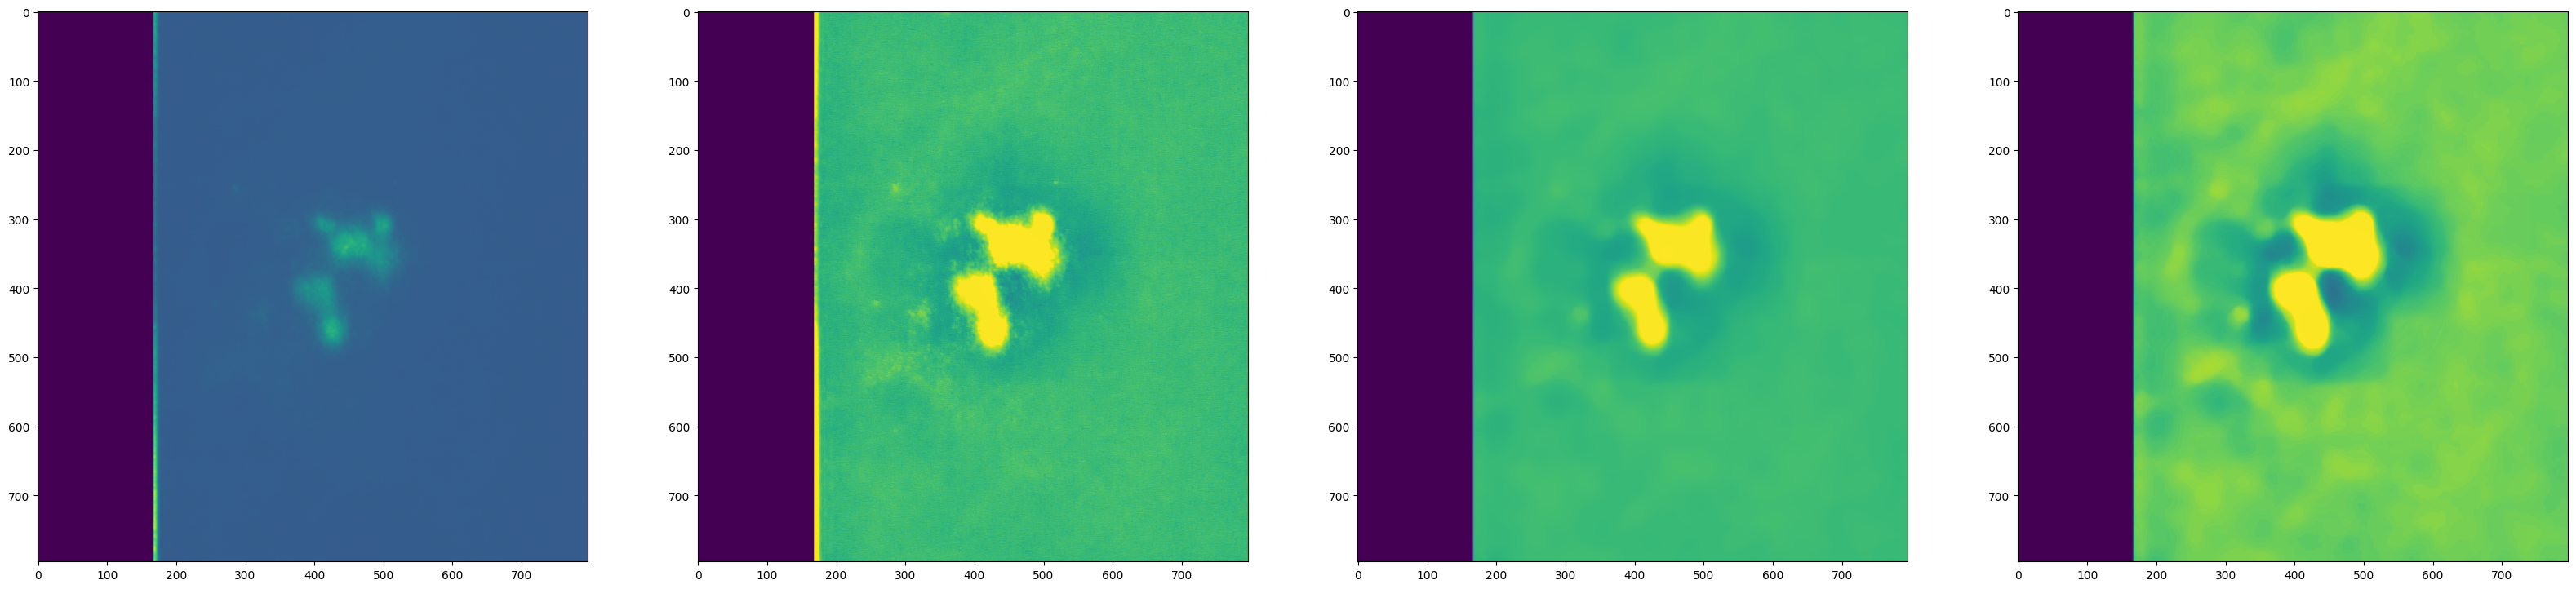

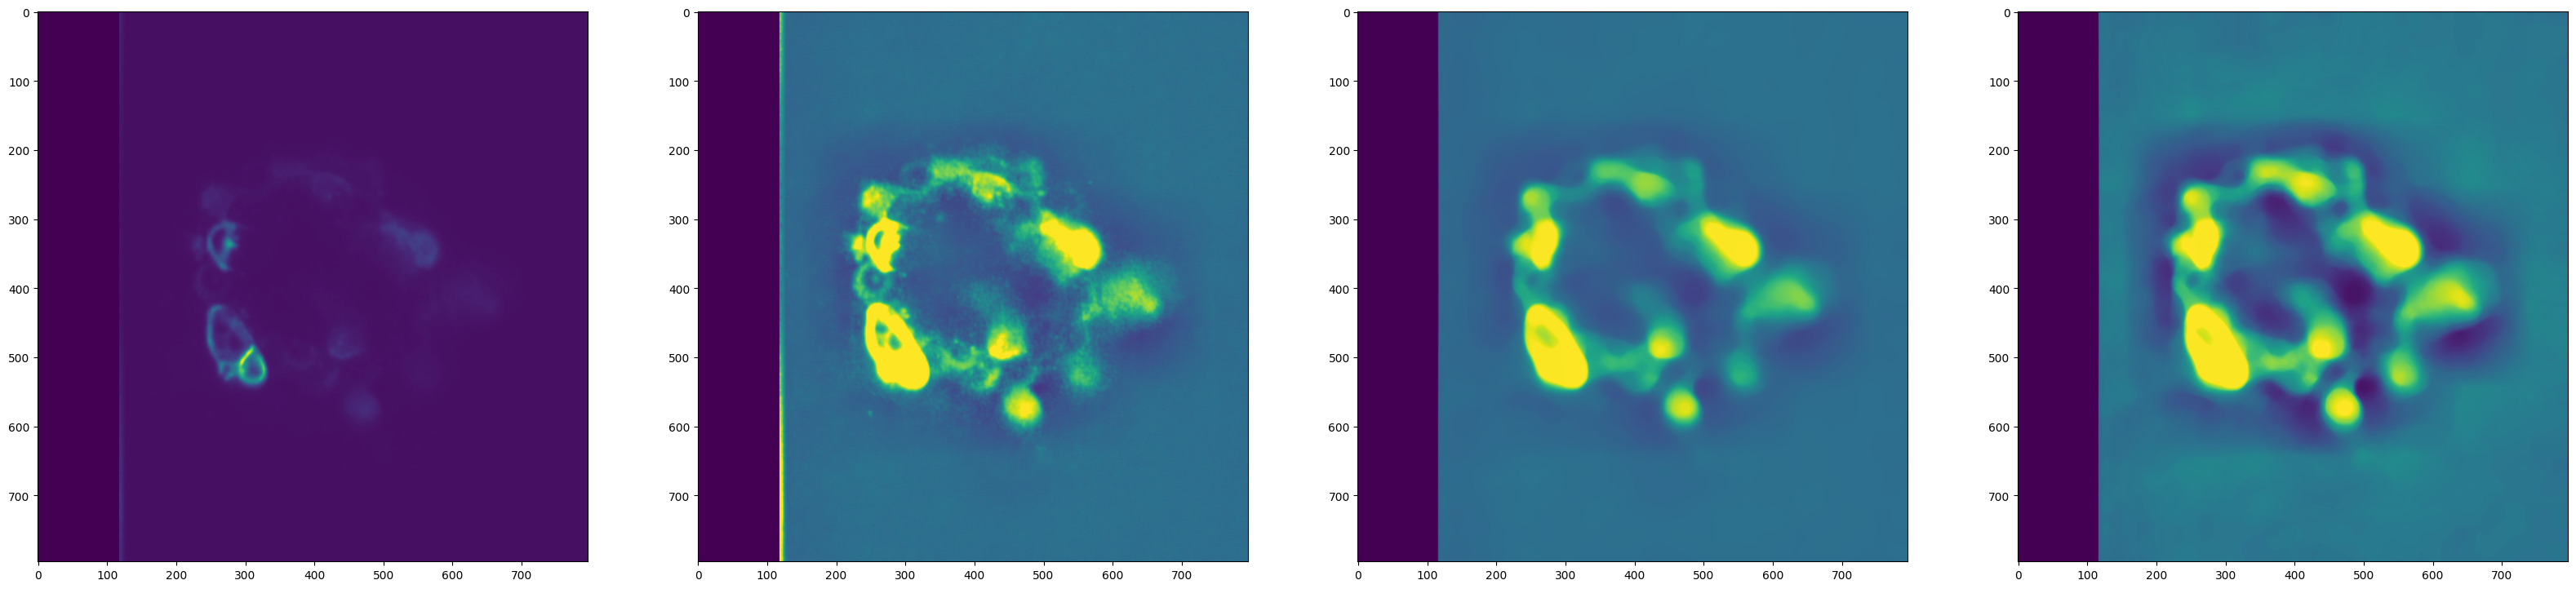

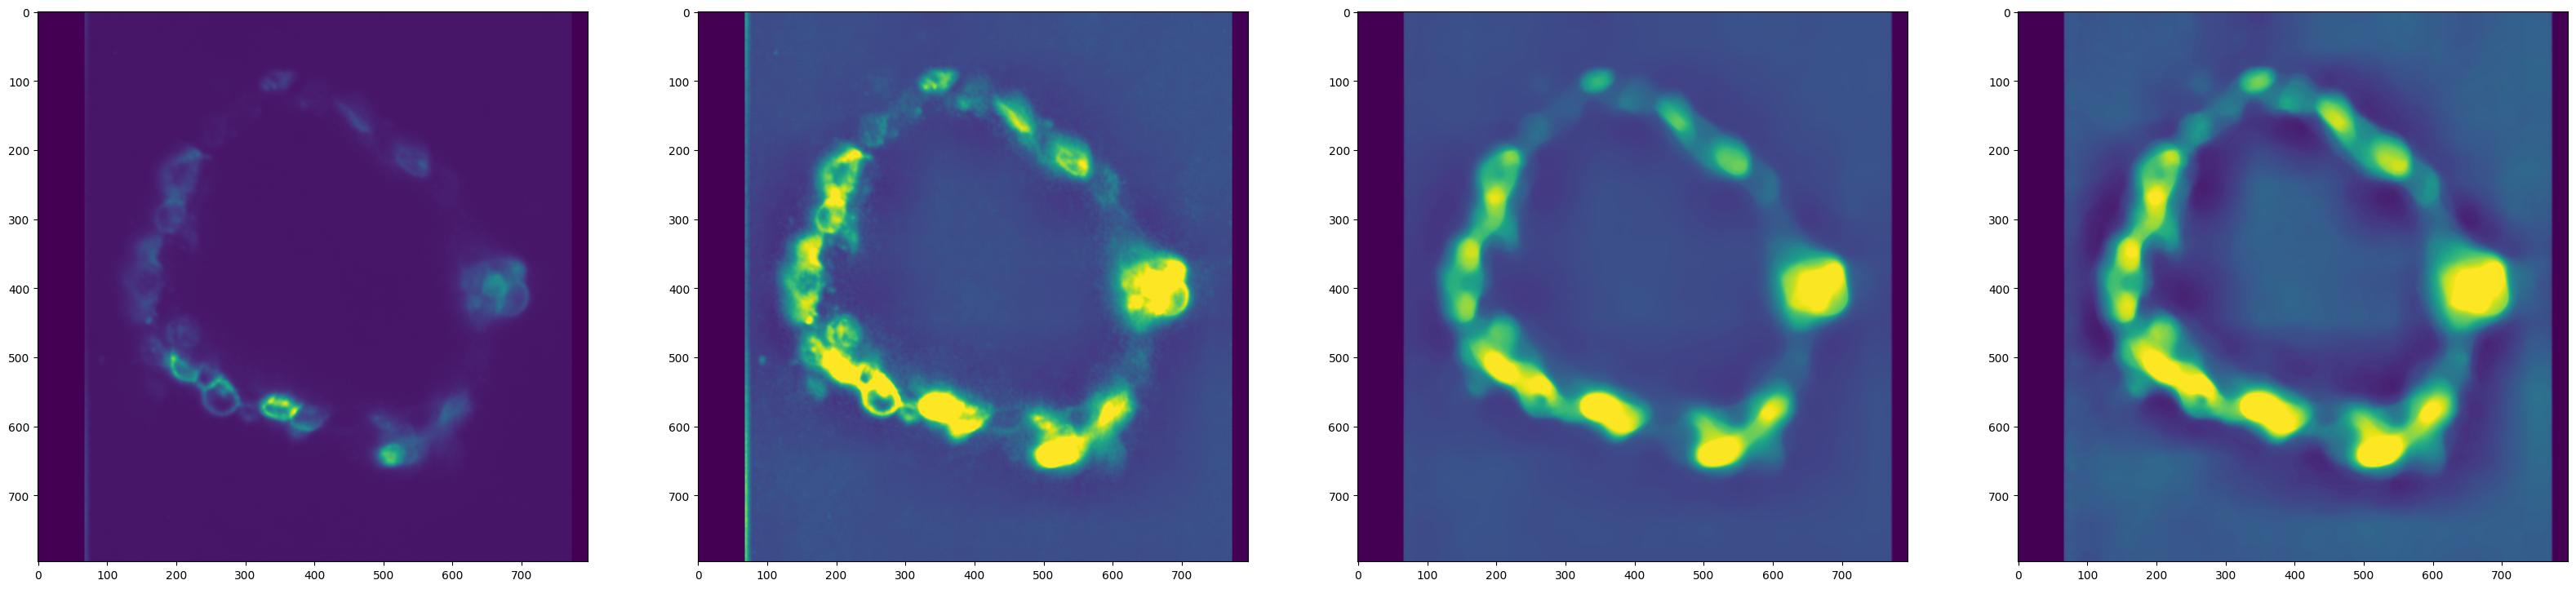

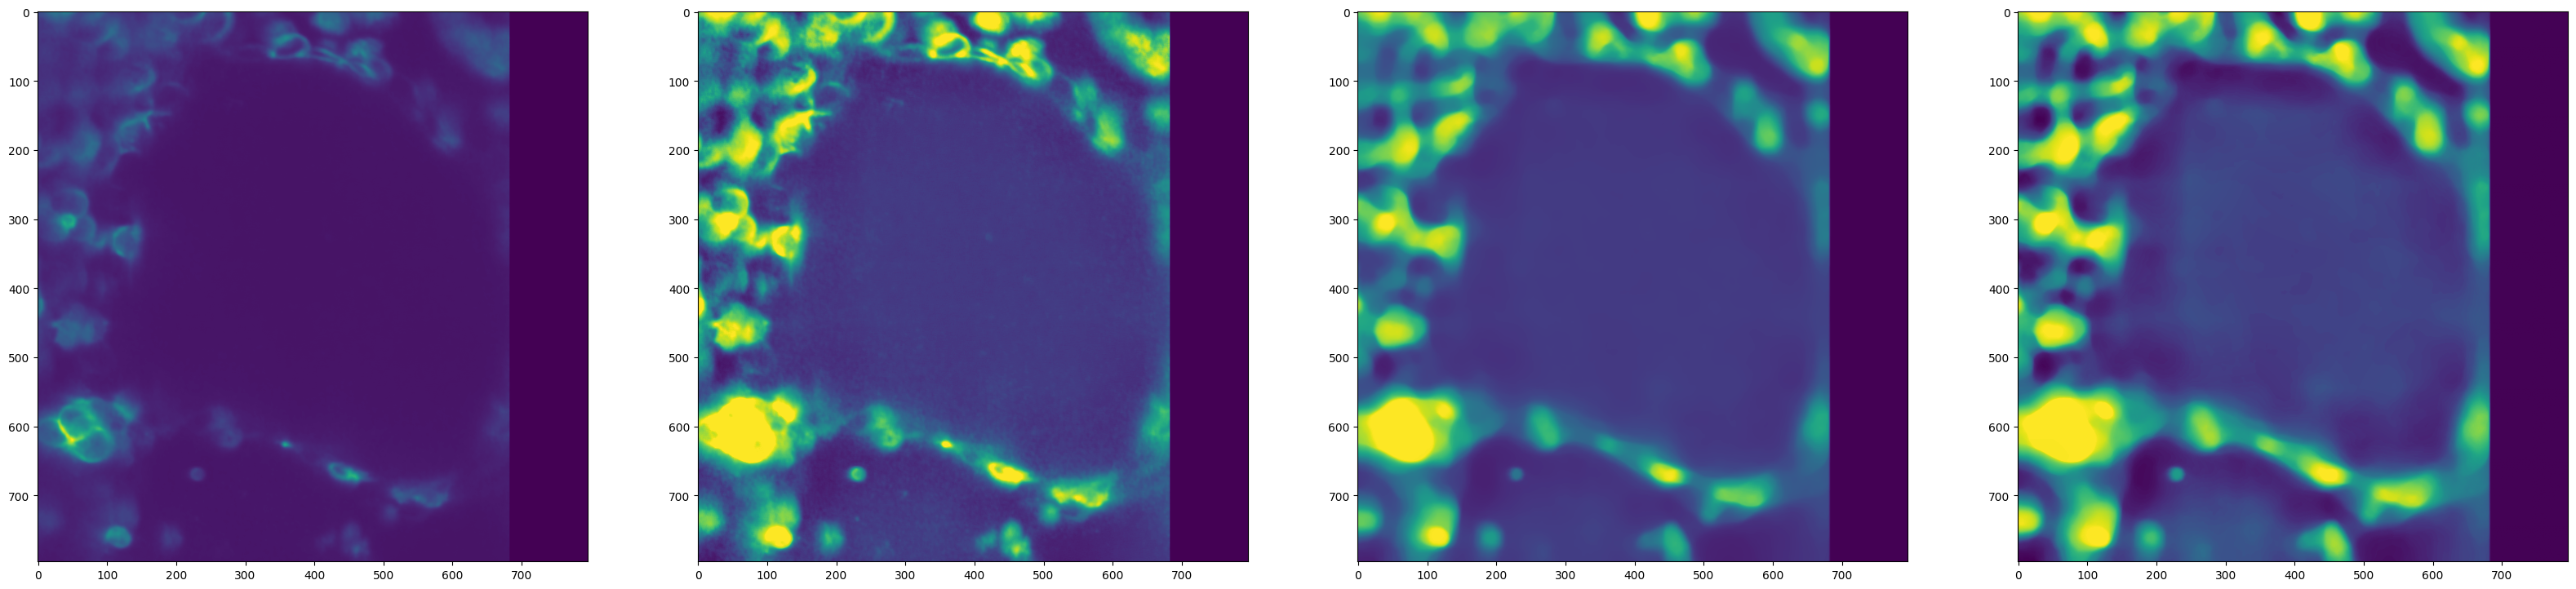

In [75]:
def clean_image(im):
    non_zero_cols = np.any(im != 0, axis = 0)
    first_non_zero_col = np.argmax(non_zero_cols)
    last_non_zero_col = len(non_zero_cols) - np.argmax(non_zero_cols[::-1]) - 1
    clean_image = im[:, first_non_zero_col:last_non_zero_col + 1]
    return (clean_image)
    
def compute_mean_no_zeros(im):
    '''
    Compute the mean pixel intensity of the image.
    '''
    return np.mean(clean_image(im))
    

def mask_single_img(im, plots=True, sub_cols = 4):
    '''
    Make a mask of the image. Combine different steps.
    '''
    
    # print('Original image mean:    ', compute_mean_no_zeros(im))
    
    if plots:
        plt.figure(figsize=(40,20))
        plt.subplot(1,sub_cols,1)
        plt.imshow(im)
    
    # Contrast stretching
    p2, p98 = np.percentile(im, (2, 98))
    im = sk.exposure.rescale_intensity(im, in_range=(p2, p98))
    
    im = sk.exposure.equalize_adapthist(im, clip_limit=0.01)
    
    # mean_no_zeros = compute_mean_no_zeros(im)
    # print('After adjust image mean:', mean_no_zeros)
    
    
    # im[im < mean_no_zeros] = 0
    # im[im > mean_no_zeros] = 255
    
    if plots:
        plt.subplot(1,sub_cols,2)
        plt.imshow(im)
    
    # im = sk.filters.unsharp_mask(im, radius=2, amount=10)
    print('Minimum pixel value:', im.min(), 'Maximum pixel value:', im.max())
    
    # im = im.astype(np.uint8)
   
    im = gaussian_filter(im, sigma=1)
    im = sk.filters.rank.median(im, sk.morphology.star(12))
    
    if plots:
        plt.subplot(1,sub_cols,3)
        plt.imshow(im)
    
    # im = im.astype(np.uint8)
    # im = cv.adaptiveThreshold(im, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 35, -1)
    
    # kernel = np.ones((4,4), np.uint8)
    # im = cv.morphologyEx(im, cv.MORPH_OPEN, kernel=kernel)
    # im = cv.morphologyEx(im, cv.MORPH_CLOSE, kernel=kernel)


    # Contrast stretching
    p2, p98 = np.percentile(im, (2, 98))
    im = sk.exposure.rescale_intensity(im, in_range=(p2, p98))
    
    im = sk.exposure.equalize_adapthist(im, clip_limit=0.01)


    if plots:
        plt.subplot(1,sub_cols,4)
        plt.imshow(im)
    
    return im
    
    






image = sk.io.imread('./domes/Dome103_processed_n2v2d.tif')
z_pos = 70
im = copy(image[70])
mask_single_img(im)
im = copy(image[120])
mask_single_img(im)
im = copy(image[170])
mask_single_img(im)
im = copy(image[260])
mask_single_img(im)

Original image mean:     26.0229
After adjust image mean: 0.6449574
Minimum pixel value: 0.0 Maximum pixel value: 1.0


C:\Users\SPIM\AppData\Local\Temp\ipykernel_19804\2930367338.py:7: UserWarning: Possible precision loss converting image of type float32 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  im = mask_single_img(im, False)


Original image mean:     26.037123
After adjust image mean: 0.64639705
Minimum pixel value: 0.0 Maximum pixel value: 1.0
Original image mean:     26.043747
After adjust image mean: 0.6473045
Minimum pixel value: 0.0 Maximum pixel value: 1.0
Original image mean:     26.033522
After adjust image mean: 0.64877164
Minimum pixel value: 0.0 Maximum pixel value: 1.0
Original image mean:     26.033987
After adjust image mean: 0.6497518
Minimum pixel value: 0.0 Maximum pixel value: 1.0
Original image mean:     26.039856
After adjust image mean: 0.65139586
Minimum pixel value: 0.0 Maximum pixel value: 1.0
Original image mean:     26.04387
After adjust image mean: 0.6534027
Minimum pixel value: 0.0 Maximum pixel value: 1.0
Original image mean:     26.050375
After adjust image mean: 0.6538672
Minimum pixel value: 0.0 Maximum pixel value: 1.0
Original image mean:     26.05234
After adjust image mean: 0.6540369
Minimum pixel value: 0.0 Maximum pixel value: 1.0
Original image mean:     26.070204
Afte

C:\Users\SPIM\AppData\Local\Temp\ipykernel_19804\2930367338.py:15: UserWarning: Possible precision loss converting image of type float32 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  im = mask_single_img(im, False)


After adjust image mean: 0.22335078
Minimum pixel value: 0.0 Maximum pixel value: 1.0
Original image mean:     34.123558
After adjust image mean: 0.22405772
Minimum pixel value: 0.0 Maximum pixel value: 1.0
Original image mean:     34.07527
After adjust image mean: 0.22481498
Minimum pixel value: 0.0 Maximum pixel value: 1.0
Original image mean:     34.25192
After adjust image mean: 0.22385162
Minimum pixel value: 0.0 Maximum pixel value: 1.0
Original image mean:     34.256878
After adjust image mean: 0.22420192
Minimum pixel value: 0.0 Maximum pixel value: 1.0
Original image mean:     34.28598
After adjust image mean: 0.2233767
Minimum pixel value: 0.0 Maximum pixel value: 1.0
Original image mean:     34.268814
After adjust image mean: 0.22303428
Minimum pixel value: 0.0 Maximum pixel value: 1.0
Original image mean:     34.221886
After adjust image mean: 0.22332978
Minimum pixel value: 0.0 Maximum pixel value: 1.0
Original image mean:     34.18512
After adjust image mean: 0.2232148
Mi

C:\Users\SPIM\AppData\Local\Temp\ipykernel_19804\2930367338.py:24: UserWarning: Possible precision loss converting image of type float32 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  im = mask_single_img(im, False)


Original image mean:     20.346558
After adjust image mean: 0.1445195
Minimum pixel value: 0.0 Maximum pixel value: 1.0
Original image mean:     20.642067
After adjust image mean: 0.1452152
Minimum pixel value: 0.0 Maximum pixel value: 1.0
Original image mean:     20.880922
After adjust image mean: 0.1455357
Minimum pixel value: 0.0 Maximum pixel value: 1.0
Original image mean:     21.10071
After adjust image mean: 0.14670539
Minimum pixel value: 0.0 Maximum pixel value: 1.0
Original image mean:     21.27191
After adjust image mean: 0.1476395
Minimum pixel value: 0.0 Maximum pixel value: 1.0
Original image mean:     21.42754
After adjust image mean: 0.14807972
Minimum pixel value: 0.0 Maximum pixel value: 1.0
Original image mean:     21.592882
After adjust image mean: 0.14840893
Minimum pixel value: 0.0 Maximum pixel value: 1.0
Original image mean:     21.78553
After adjust image mean: 0.14900938
Minimum pixel value: 0.0 Maximum pixel value: 1.0
Original image mean:     22.010895
After

ValueError: Images of type float must be between -1 and 1.

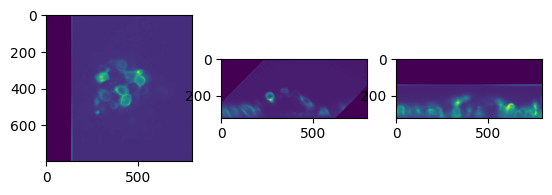

In [58]:
# Mask 3, 4, 5
image = sk.io.imread('./domes/Dome103_processed_n2v2d.tif')
mask3 = []
plt.subplot(1,3,1)
plt.imshow(image[100])
for im in image:
    im = mask_single_img(im, False)
    mask3.append(im)
mask3 = np.array(mask3)
image = np.transpose(image, axes=(1,0,2))
mask4 = []
plt.subplot(1,3,2)
plt.imshow(image[100])
for im in image:
    im = mask_single_img(im, False)
    mask4.append(im)
mask4 = np.array(mask4)
mask4 = np.transpose(mask4, axes=(1,0,2))
image = np.transpose(image, axes=(2,1,0))
mask5 = []
plt.subplot(1,3,3)
plt.imshow(image[100])
for im in image:
    im = mask_single_img(im, False)
    mask5.append(im)
mask5 = np.array(mask5)


In [62]:
# mask 1

image = sk.io.imread('./domes/Dome103_processed.tif')
mask = []
for im in image:
    
    non_zero_cols = np.any(im != 0, axis = 0)
    first_non_zero_col = np.argmax(non_zero_cols)
    last_non_zero_col = len(non_zero_cols) - np.argmax(non_zero_cols[::-1]) - 1
    clean_image = im[:, first_non_zero_col:last_non_zero_col + 1]
    
    im[im < np.mean(clean_image)] = 0
    im[im > np.mean(clean_image)] = 255
    
    kernel = np.ones((4,4), np.uint8)

    th3_im = cv.morphologyEx(im, cv.MORPH_OPEN, kernel=kernel)
    th3_im = cv.morphologyEx(th3_im, cv.MORPH_CLOSE, kernel=kernel)

    gaussian_im = gaussian_filter(th3_im, sigma=1)
    median_im = sk.filters.rank.median(gaussian_im, sk.morphology.star(12))
    # th3_im = cv.adaptiveThreshold(median_im, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 55, -1) # Needs uint8 to make the asaptive threshold mask
    th3_im = cv.morphologyEx(median_im, cv.MORPH_OPEN, kernel=kernel)
    th3_im = cv.morphologyEx(th3_im, cv.MORPH_CLOSE, kernel=kernel)
    th3_im = th3_im.astype(np.uint8)
    # th2 = cv.adaptiveThreshold(th3_im,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,55,2)
    
    mask.append(th3_im)
    
mask = np.array(mask)

In [323]:
# mask 2

image = sk.io.imread('./../domes/Dome103_processed_n2v2d.tif')
mask2 = []
for im in image:
    
    im = im.astype(np.uint16)
    
    non_zero_cols = np.any(im != 0, axis = 0)
    first_non_zero_col = np.argmax(non_zero_cols)
    last_non_zero_col = len(non_zero_cols) - np.argmax(non_zero_cols[::-1]) - 1
    clean_image = im[:, first_non_zero_col:last_non_zero_col + 1]
    
    im[im < np.mean(clean_image)] = 0
    im[im > np.mean(clean_image)] = 255
    
    kernel = np.ones((4,4), np.uint8)

    th3_im = cv.morphologyEx(im, cv.MORPH_OPEN, kernel=kernel)
    th3_im = cv.morphologyEx(th3_im, cv.MORPH_CLOSE, kernel=kernel)

    gaussian_im = gaussian_filter(th3_im, sigma=1)
    median_im = sk.filters.rank.median(gaussian_im, sk.morphology.star(12))
    # th3_im = cv.adaptiveThreshold(median_im, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 55, -1) # Needs uint8 to make the asaptive threshold mask
    th3_im = cv.morphologyEx(median_im, cv.MORPH_OPEN, kernel=kernel)
    th3_im = cv.morphologyEx(th3_im, cv.MORPH_CLOSE, kernel=kernel)
    th3_im = th3_im.astype(np.uint8)
    # th2 = cv.adaptiveThreshold(th3_im,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,55,2)
    
    mask2.append(th3_im)
    
mask2 = np.array(mask2)

In [71]:
# Mask 6, 7
image = sk.io.imread('./domes/Dome103_processed_n2v2d.tif')
image = np.transpose(image, axes=(1,0,2))
mask6 = []
for im in image:
    im = mask_single_img(im, False)
    mask6.append(im)
mask6 = np.array(mask6)

image = np.transpose(image, axes=(2,1,0))
mask7 = []
for im in image:
    im = mask_single_img(im, False)
    mask7.append(im)
mask7 = np.array(mask7)
mask7 = np.transpose(mask7, axes=(2,1,0))

viewer = napari.Viewer()
viewer.add_image(mask6)
viewer.add_image(mask7)

Minimum pixel value: 0.0 Maximum pixel value: 1.0
Minimum pixel value: 0.0 Maximum pixel value: 1.0


C:\Users\SPIM\AppData\Local\Temp\ipykernel_19804\1260956254.py:6: UserWarning: Possible precision loss converting image of type float32 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  im = mask_single_img(im, False)


Minimum pixel value: 0.0 Maximum pixel value: 1.0
Minimum pixel value: 0.0 Maximum pixel value: 1.0
Minimum pixel value: 0.0 Maximum pixel value: 1.0
Minimum pixel value: 0.0 Maximum pixel value: 1.0
Minimum pixel value: 0.0 Maximum pixel value: 1.0
Minimum pixel value: 0.0 Maximum pixel value: 1.0
Minimum pixel value: 0.0 Maximum pixel value: 1.0
Minimum pixel value: 0.0 Maximum pixel value: 1.0
Minimum pixel value: 0.0 Maximum pixel value: 1.0
Minimum pixel value: 0.0 Maximum pixel value: 1.0
Minimum pixel value: 0.0 Maximum pixel value: 1.0
Minimum pixel value: 0.0 Maximum pixel value: 1.0
Minimum pixel value: 0.0 Maximum pixel value: 1.0
Minimum pixel value: 0.0 Maximum pixel value: 1.0
Minimum pixel value: 0.0 Maximum pixel value: 1.0
Minimum pixel value: 0.0 Maximum pixel value: 1.0
Minimum pixel value: 0.0 Maximum pixel value: 1.0
Minimum pixel value: 0.0 Maximum pixel value: 1.0
Minimum pixel value: 0.0 Maximum pixel value: 1.0
Minimum pixel value: 0.0 Maximum pixel value: 1.0


C:\Users\SPIM\AppData\Local\Temp\ipykernel_19804\1260956254.py:13: UserWarning: Possible precision loss converting image of type float32 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  im = mask_single_img(im, False)


Minimum pixel value: 0.0 Maximum pixel value: 1.0
Minimum pixel value: 0.0 Maximum pixel value: 1.0
Minimum pixel value: 0.0 Maximum pixel value: 1.0
Minimum pixel value: 0.0 Maximum pixel value: 1.0
Minimum pixel value: 0.0 Maximum pixel value: 1.0
Minimum pixel value: 0.0 Maximum pixel value: 1.0
Minimum pixel value: 0.0 Maximum pixel value: 1.0
Minimum pixel value: 0.0 Maximum pixel value: 1.0
Minimum pixel value: 0.0 Maximum pixel value: 1.0
Minimum pixel value: 0.0 Maximum pixel value: 1.0
Minimum pixel value: 0.0 Maximum pixel value: 1.0
Minimum pixel value: 0.0 Maximum pixel value: 1.0
Minimum pixel value: 0.0 Maximum pixel value: 1.0
Minimum pixel value: 0.0 Maximum pixel value: 1.0
Minimum pixel value: 0.0 Maximum pixel value: 1.0
Minimum pixel value: 0.0 Maximum pixel value: 1.0
Minimum pixel value: 0.0 Maximum pixel value: 1.0
Minimum pixel value: 0.0 Maximum pixel value: 1.0
Minimum pixel value: 0.0 Maximum pixel value: 1.0
Minimum pixel value: 0.0 Maximum pixel value: 1.0


ValueError: Images of type float must be between -1 and 1.

In [63]:
viewer = napari.Viewer()

viewer.add_image(image)
# viewer.add_image(prediction_image)
viewer.add_image(mask3)
# mask4 = np.transpose(mask4, axes=(1,0,2))
# mask4 = np.transpose(mask4, axes=(2,1,0))
viewer.add_image(mask4)

<Image layer 'mask4' at 0x1a87206d9d0>

In [64]:
viewer = napari.Viewer()

viewer.add_image(image)
# viewer.add_image(prediction_image)
viewer.add_image(mask)

<Image layer 'mask' at 0x1a871f40ed0>

In [15]:
import tifffile as tiff
#tiff.imsave('Dome103_denoised_mask.tif', mask2)